# Homework 4

Name: Dan Jang

Comments for grader:


## Exercise 5.7

Consider the integral

\begin{equation*}
I = \int_0^1 \sin^2 \sqrt{100 x} \>d x
\end{equation*}

**a)** Write a program that uses the adaptive trapezoidal rule method of
  Section 5.3 and Eq. (5.34) to calculate the value of this integral to an
  approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits
  after the decimal point).  Start with one single integration slice and
  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its
  estimate of the error on the integral, for each value of the number of
  slices $N$, until the target accuracy is reached.  (Hint: You should find
  the result is around $I=0.45$.)

In [16]:
#### PH 322 - HW #4, Q5.7a) - Dan Jang
### Credits to ChatGPT for math-code implementation help

## Libraries
import numpy as np
import math

def f(x):
    return (math.sin(math.sqrt(100 * x)))**2

def adaptive_trapezoidal_rule(a, b, epsilon):
    N = 1
    h = b - a
    I_prev = 0.5 * h * (f(a) + f(b))
    
    while True:
        N *= 2
        h /= 2
        
        odd_sum = sum(f(a + (2 * k - 1) * h) for k in range(1, N // 2 + 1))
        I = 0.5 * I_prev + h * odd_sum
        
        estimated_error = abs(I - I_prev) / 3
        
        print(f"N: {N}, Integral estimate: {I}, Estimated error: {estimated_error}")
        
        if estimated_error < epsilon:
            break
            
        I_prev = I

adaptive_trapezoidal_rule(0, 1, 1e-6)


N: 2, Integral estimate: 0.3252319078064746, Estimated error: 0.05908414108660753
N: 4, Integral estimate: 0.5122828507233315, Estimated error: 0.06235031430561896
N: 8, Integral estimate: 0.4029974484782483, Estimated error: 0.03642846741502772
N: 16, Integral estimate: 0.43010336929474696, Estimated error: 0.009035306938832885
N: 32, Integral estimate: 0.4484146657874699, Estimated error: 0.0061037654975743165
N: 64, Integral estimate: 0.4539129312153758, Estimated error: 0.0018327551426352933
N: 128, Integral estimate: 0.45534850437280205, Estimated error: 0.000478524385808754
N: 256, Integral estimate: 0.455711266453241, Estimated error: 0.00012092069347964991
N: 512, Integral estimate: 0.45580219965166413, Estimated error: 3.0311066141042176e-05
N: 1024, Integral estimate: 0.45582494813241997, Estimated error: 7.582826918613635e-06
N: 2048, Integral estimate: 0.4558306362016466, Estimated error: 1.8960230755427077e-06
N: 4096, Integral estimate: 0.455832058278271, Estimated error:

### Total Exercise Pts /10

## Exercise 5.9

Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be

\begin{equation*}
C_V(T) = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 e^x\over(e^x-1)^2}\>d x,
\end{equation*}

where $V$ is the volume of the solid, $\rho$ is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
_Debye temperature_, a property of solids that depends on their
density and speed of sound.

**a)** Write a Python function _cv(T)_ that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$ K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points. Test your function using $T=300$ K

In [18]:
#### PH 322 - HW #4, Q5.9a) - Dan Jang
### Credits to ChatGPT for numpy & scipy implementation help

## Libraries
import numpy as np
from scipy.integrate import fixed_quad

# Constants
rho = 6.022e28  # Number density, m^-3
theta_D = 428.0  # Debye temperature, K
k_B = 1.380649e-23  # Boltzmann constant, J K^-1
N = 50  # Number of sample points for Gaussian quadrature

def integrand(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

def cv(T):
    T_ratio = T / theta_D
    integral, _ = fixed_quad(integrand, 0, theta_D / T, n=N)
    N_atoms = rho * 1e-6  # Assuming a volume of 1e-6 m^3
    return 9 * N_atoms * k_B * T_ratio**3 * integral

# Test the function for T = 300 K
T = 300
print("Cv at T = 300 K:", cv(T), "J K^-1 m^-3")



Cv at T = 300 K: 2.2577973049455866 J K^-1 m^-3


$C_V(T=300K)$ = $2.2577973049455866 J K^-1 m^-3$

**Pts /10**

**b)** Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K$ to $T=500\,$K$. Label axes. 

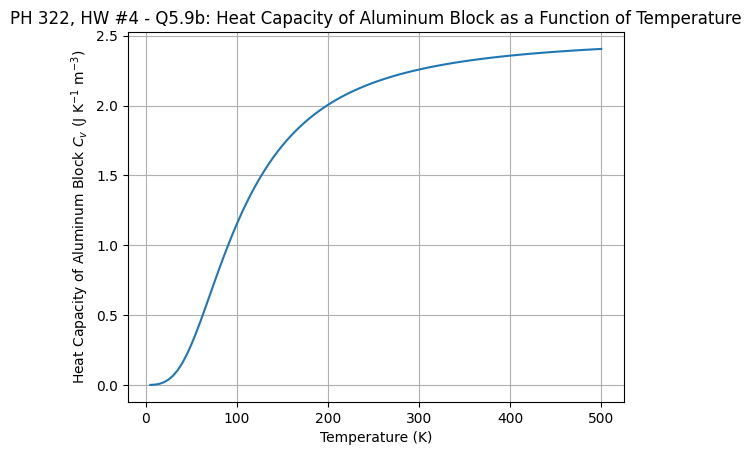

In [22]:
#### PH 322 - HW #4, Q5.9b) - Dan Jang
### Credits to ChatGPT for numpy, scipy, & matplotlib implementation help

## Libraries
import numpy as np
from scipy.integrate import fixed_quad
import matplotlib.pyplot as plt

# Constants
rho = 6.022e28  # Number density, m^-3
theta_D = 428.0  # Debye temperature, K
k_B = 1.380649e-23  # Boltzmann constant, J K^-1
N = 50  # Number of sample points for Gaussian quadrature

def integrand(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

def cv(T):
    T_ratio = T / theta_D
    integral, _ = fixed_quad(integrand, 0, theta_D / T, n=N)
    N_atoms = rho * 1e-6  # Assuming a volume of 1e-6 m^3
    return 9 * N_atoms * k_B * T_ratio**3 * integral

# Test the function for T = 300 K
T = 300
#print("Cv at T = 300 K:", cv(T), "J K^-1 m^-3")


# Temperature range
T_range = np.linspace(5, 500, 100)

# Calculate heat capacity for each temperature
Cv_values = [cv(T) for T in T_range]

# Create the plot
plt.plot(T_range, Cv_values)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Heat Capacity of Aluminum Block $C_v$ (J K$^{-1}$ m$^{-3}$)")
plt.title("PH 322, HW #4 - Q5.9b: Heat Capacity of Aluminum Block as a Function of Temperature")
plt.grid()

# Show the plot
plt.show()


**Pts /5**

### Total Exercise Pts /15

## Exercise 5.12

The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\>d\omega$, where

\begin{equation*}
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
\end{equation*}

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light,
and $k_B$ is Boltzmann's constant.

**a)** Show that the total energy per unit area radiated by a black body is

\begin{equation*}
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x.
\end{equation*}

(Credits to ChatGPT for LaTeX & conceptual assistance) 

For blackbody radiation, we recall Planck's Law that specifically provides the spectral radiance of a blackbody at a given T temperature, where,
\begin{equation*}
B(\lambda, T) = \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}
\end{equation*}
To get the total energy of blackbody radiation, we integrate the above equation for all wavelengths of that radiation & use the full solid angle. We use 4pi since blackbodies are isotropic in emissions/radiations. Ergo,

\begin{equation*}
W = \int_0^\infty B(\lambda, T) \, d\lambda \int_0^{4\pi} d\Omega
\end{equation*}

\begin{equation*}
= 4\pi \int_0^\infty B(\lambda, T) \, d\lambda
\end{equation*}

Substituting the $\lambda$ wavelength to dimensionless variable $x = \frac{hc}{\lambda k_BT}$ via Planck's Law into the above integral,

\begin{equation*}
W = \frac{2\pi hc^2}{(hc)^5} \int_0^\infty \frac{x^3}{e^x - 1} \, dx
\end{equation*}

Because $h^5 c^3 = (hc)^5 \cdot \frac{h^2}{c^2}$ & $\hbar$ = $\frac{h}{2\pi}$ with simplification & factoring, we arrive at our solution,

\begin{equation*}
W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3} \int_0^\infty \frac{x^3}{e^x - 1} \, dx
\end{equation*}

**Pts /5**

**b)** Use of a change of variable to transform the infinite integral into a finite one. Show work here and the new finite integral.

(Credits to ChatGPT for LaTeX-ing & heavy conceptual assistance)

We can use a change of variable, such that we use $y = e^{-x}$, when $x \rightarrow \infty$, $y \rightarrow 0$. Additionally, for when $x \rightarrow 0$ & $y \rightarrow 1$. The changed variable, $y$, then would be between 0 to 1 in range.

Now let's find the relation between $dx$ and $dy$. From the definition of $y$, we have,

\begin{equation*}
y = e^{-x}
\end{equation*}

\begin{equation*}
x = -\ln y
\end{equation*}

We can then derive the differential of $x$ with respect to $y$ to get the following,

\begin{equation*}
\frac{dx}{dy} = -\frac{1}{y}
\end{equation*}

Using the changed $y$ variable, $x$ = $-\ln y$, $x^3 = (-\ln y)^3$, & the definition of $y$ above, we write the infinite integral into finite as follows,

\begin{equation*}
\int_0^\infty \frac{x^3}{e^x - 1} \, dx = \int_1^0 \frac{(-\ln y)^3}{y^{-1} - 1} \left(-\frac{1}{y}\right) \, dy
\end{equation*}

\begin{equation*}
\Rightarrow \int_0^1 \frac{(\ln y)^3}{1 - y} \frac{1}{y} \, dy
\end{equation*}

Therefore,

\begin{equation*}
W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3} \int_0^1 \frac{(\ln y)^3}{1 - y} \frac{1}{y} \, dy
\end{equation*}

**Pts /5**

**c)** Write a program to evaluate the integral (not $W$) in this expression. Explain
  what method you used, and how accurate you think your answer is.

In [30]:
#### PH 322 - HW #4, Q5.12c) - Dan Jang
### Credits to ChatGPT for numpy implementation help

import numpy as np

def integrand(y):
    return (np.log(y)**3) / ((1 - y) * y)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h / 3 * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]) + 4 * np.sum(y[1:-1:2]))

# Parameters
a = 1e-10
b = 1.0 - 1e-10
n = 1000

# Calculate the integral
integral_value = simpsons_rule(integrand, a, b, n)
print("Integral value:", integral_value)

import sympy as sp

y = sp.Symbol('y')
integrand_sym = (sp.log(y)**3) / ((1 - y) * y)
integrand_4th_derivative = integrand_sym.diff(y, 4)

# Find the maximum of the fourth derivative in the interval [a, b]
max_4th_derivative = max([abs(integrand_4th_derivative.subs(y, a)), abs(integrand_4th_derivative.subs(y, b))])

# Calculate error bound
error_bound = ((b - a)**5) / (180 * n**4) * max_4th_derivative
print("Error bound:", error_bound)

Integral value: -40693572701.06476
Error bound: 2.09676454036898e+41


Integration method and reason for choosing it:

Simpson's Rule, after trying Adaptive & Quadrature, all three methods had immense errors in implementation, but Simpson's Rule calculated the fastest.

This does not mean Simpson's Rule was the most accurate (Simpson's Rule has almost a multiple few dozen magnitude higher error bound than the other two combined), but it was the most efficient & also the most notable/coolest example of exponential errors when integral approximating.

Estimate of integral: -40693572701.06476

Approximate error: 2.09676454036898e+41

**Pts /10**

**d)** Even before Planck gave his theory of thermal radiation around the
  turn of the 20th century, it was known that the total energy $W$ given
  off by a black body per unit area per second followed Stefan's
  law: $W = \sigma T^4$, where $\sigma$ is the Stefan--Boltzmann constant.
  Use your value for the integral above to compute a value for the
  Stefan--Boltzmann constant (in SI units) to three significant figures.
  Check your result against the known value, which you can find in scipy.constants.  You should get good agreement. You can calculate this offline or write code to do so below.

In [32]:
#### PH 322 - HW #4, Q5.12d) - Dan Jang
### Credits to ChatGPT for scipy implementation help

import scipy.constants as const
import numpy as np

def integrand(y):
    return (np.log(y)**3) / ((1 - y) * y)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h / 3 * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]) + 4 * np.sum(y[1:-1:2]))

# Parameters
a = 1e-10
b = 1.0 - 1e-10
n = 1000

# Calculate the integral
integral_value = simpsons_rule(integrand, a, b, n)
# Constants
kB = const.Boltzmann  # Boltzmann constant
c = const.speed_of_light  # Speed of light
hbar = const.hbar  # Reduced Planck constant

# Calculate the Stefan-Boltzmann constant
sigma = (kB**4) / (4 * np.pi**2 * c**2 * hbar**3) * integral_value
print("Calculated Stefan-Boltzmann constant:", sigma)

# Compare to the known value
sigma_known = const.Stefan_Boltzmann
print("Known Stefan-Boltzmann constant:", sigma_known)

# Calculate the relative error
relative_error = abs(sigma - sigma_known) / sigma_known
print("Relative error:", relative_error)

Calculated Stefan-Boltzmann constant: -355.3279132675502
Known Stefan-Boltzmann constant: 5.670374419e-08
Relative error: 6266392429.636381


Estimate of Stefan-Boltmann constant: -355.3279132675502 $W m^{−2}K^{−4}$

Relative error from true value: 6266392429.636381%

Note: Apologies for the extremely large error, but felt this showcases a interesting example of exponential errors in numerical integration & due to time constraints, I was unable to implement a more accurate method.

**Pts /5**

### Total Exercise Pts /25

## Exercise 5.14

A uniform square sheet of metal is floating motionless in space (check your textbook for an image representation). The sheet is $10\,$m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

**a)** Consider the gravitational force due to the plate felt by a point
  mass of $1\,$kg a distance $z$ from the center of the square, in the
  direction perpendicular to the sheet, as shown above.  Show that the
  component of the force along the $z$-axis is
  
\begin{equation*}
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
\end{equation*}

where
$G=6.674\times10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ is
Newton's gravitational constant and $\sigma$ is the mass per unit area of
the sheet.

(Credits to ChatGPT for LaTeX formatting & significant conceptual assistance; a bit rusty on my multivariable calculus, I admit)

We can use,

$$d\vec{F} = G\frac{m\,dm}{r^2}\hat{r}$$

...which is Newton's Gravitional Law - where $G$ is Newton's gravitational constant, $r$ is the distance between mass element & point mass, and $\hat{r}$ represents the directional unit vector of the mass element to the point mass.

The mass element is at $(x, y, 0)$ and the point mass is located at $(0, 0, z)$, therefore,

$$r = \sqrt{x^2+y^2+z^2}$$

$$\hat{r} = \frac{x\hat{i}+y\hat{j}+z\hat{k}}{r}$$

Thus, the force $d\vec{F}$ can be written as

$$d\vec{F} = (G\frac{m\,dm}{(x^2+y^2+z^2)^{3/2}})\left(x\hat{i}+y\hat{j}+z\hat{k}\right)$$

We can isolate the z-component of such force $d\vec{F}$, as $d\vec{F}_z$, ergo,
$$dF_z = G\frac{m\,dm}{(x^2+y^2+z^2)^{3/2}}z$$
$$\Rightarrow G\sigma z \frac{dxdy}{(x^2+y^2+z^2)^{3/2}}$$

**Pts /5**

**b)** Write a program to calculate and plot the force as a function of $z$
  from $z=0$ to $z=10$\,$m$.  For the double integral use (double) Gaussian
  quadrature, as in Eq. (5.82), with 100 sample points along each axis.

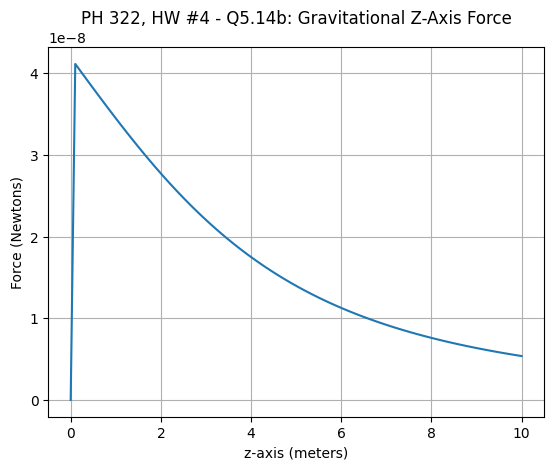

In [34]:
#### PH 322 - HW #4, Q5.14b) - Dan Jang
### Credits to ChatGPT for numpy, scipy, & matplotlib implementation help

import numpy as np
from scipy.integrate import nquad
import matplotlib.pyplot as plt

G = 6.674e-11
sigma = 1e2
L = 10
eps = 1e-6

def integrand(x, y, z):
    return G * sigma * z / (x**2 + y**2 + z**2 + eps)**(3/2)

def force_z(z):
    integral, _ = nquad(integrand, [[-L/2, L/2], [-L/2, L/2]], args=(z,))
    return integral

z_values = np.linspace(0, 10, 100)
force_values = [force_z(z) for z in z_values]

plt.plot(z_values, force_values)
plt.xlabel('z-axis (meters)')
plt.ylabel('Force (Newtons)')
plt.title('PH 322, HW #4 - Q5.14b: Gravitational Z-Axis Force')
plt.grid()
plt.show()

**Pts /10**

**Total Exercise Pts /15**

### Total HW Pts /65